# Assignment 3

## Imports

In [1]:
import os
import time
from typing import Literal

import cv2
import librosa
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from matplotlib.axes import Axes

## Constants

In [2]:
PROJECT_DIR = '..'
IMAGES_DIR = os.path.join(PROJECT_DIR, 'data')
OUTPUT_DIR = os.path.join(PROJECT_DIR, 'src/output')
PLOTS_DIR = os.path.join(PROJECT_DIR, 'src/plots')

## Helper Functions

In [3]:
def read_image(src_path: str, color_space: Literal['rgb', 'gray', 'alpha'] = 'rgb') -> npt.NDArray[np.uint8]:
    """ Reads an image into an array, given the absolute path. """

    if color_space == 'rgb':
        image = cv2.imread(src_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif color_space == 'gray':
        image = cv2.imread(src_path, 0)
    elif color_space == 'alpha':
        image = cv2.imread(src_path, cv2.IMREAD_UNCHANGED)
        _, _, _, image = cv2.split(image)
    else:
        raise ValueError(f'Unrecognised color space argument {color_space}')
    return image

In [4]:
def write_image(dest_path: str, image: npt.NDArray[np.uint8]) -> None:
    """ Writes an array as an image file, given the absolute path. """

    if image.ndim == 3:
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(dest_path, image_bgr)
    else:
        cv2.imwrite(dest_path, image)

In [5]:
def display_image(image: npt.NDArray[np.uint8], title: str = '', ax: Axes = None) -> None:
    """ Displays the image represented by an array. """

    if ax is None:
        if image.ndim == 3:
            plt.imshow(image)
        else:
            plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()

    else:
        if image.ndim == 3:
            ax.imshow(image)
        else:
            ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')

In [6]:
def save_plot(dest_path: str) -> None:
    """ Saves the plot as an image file, given the absolute path. """

    plt.savefig(dest_path, bbox_inches='tight')

## Questions

### Question 1

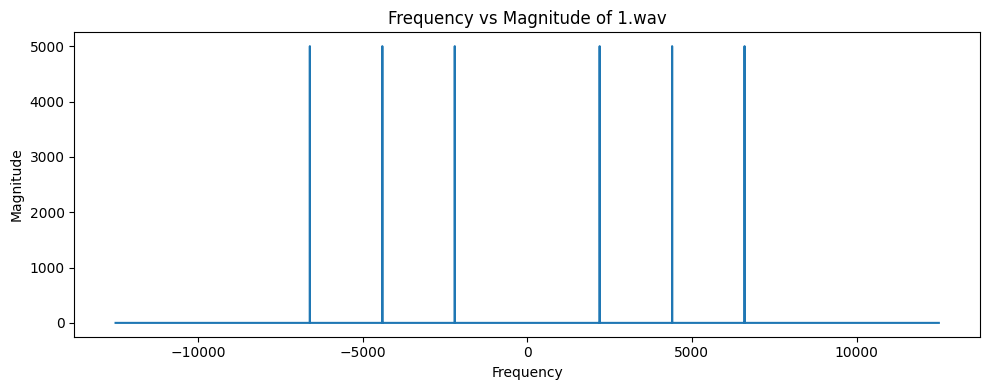

In [ ]:
def dft1(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 1D Discrete Fourier Transform (DFT) of an array. """

    assert x.ndim == 1
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = np.exp(-2j * np.pi * k * n / N)
    return np.dot(exponent, x)

y, sr = librosa.load(f'{IMAGES_DIR}/1.wav', sr=5000)
y_dft = np.fft.fftshift(np.abs(dft1(y)))

plt.figure(figsize=(10, 4))
plt.plot(np.arange(-np.ceil(y_dft.shape[0] / 2), np.floor(y_dft.shape[0] / 2)), y_dft)
plt.title('Frequency vs Magnitude of 1.wav')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/1_wav_frequency_magnitude.png')

In [8]:
def dft2(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 2D Discrete Fourier Transform (DFT) of an array. """

    assert x.ndim == 2
    dft_rows = np.apply_along_axis(dft1, axis=1, arr=x)
    return np.apply_along_axis(dft1, axis=0, arr=dft_rows)

In [ ]:
def fft1(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 1D Fast Fourier Transform (FFT) of an array. """

    assert x.ndim == 1
    N = x.shape[0]

    # Padding
    if not np.log2(N).is_integer():
        N_padded = 2**int(np.ceil(np.log2(N)))
        x = np.pad(x, (0, N_padded - N))
        N = N_padded

    # Base case
    if N <= 1:
        return x

    # Recursion
    even = fft1(x[::2])
    odd = fft1(x[1::2])
    T = np.exp(-2j * np.pi * np.arange(N // 2) / N) * odd
    return np.concatenate([even + T, even - T])

In [ ]:
def fft2(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 2D Fast Fourier Transform (FFT) of an array. """

    assert x.ndim == 2
    rows, cols = x.shape

    # Padding
    if not np.log2(rows).is_integer():
        rows_padded = 2**int(np.ceil(np.log2(rows)))
        x = np.pad(x, ((0, rows_padded - rows), (0, 0)))
    if not np.log2(cols).is_integer():
        cols_padded = 2**int(np.ceil(np.log2(cols)))
        x = np.pad(x, ((0, 0), (0, cols_padded - cols)))

    # Apply fft1
    fft_rows = np.apply_along_axis(fft1, axis=1, arr=x)
    return np.apply_along_axis(fft1, axis=0, arr=fft_rows)

def fftshift(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Shifts the zero-frequency component to the center of the spectrum. """

    return np.roll(x, [dim // 2 for dim in x.shape], tuple(range(x.ndim)))

def fftshift_log(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Applies the log transform and fftshift (in order). """

    return fftshift(np.log(1 + x))

def fftshift_abs(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Applies the absolute operator and fftshift (in order). """

    return fftshift(np.abs(x))

def fftshift_log_abs(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Applies the absolute operator, log transform and fftshift (in order). """

    return fftshift(np.log(1 + np.abs(x)))

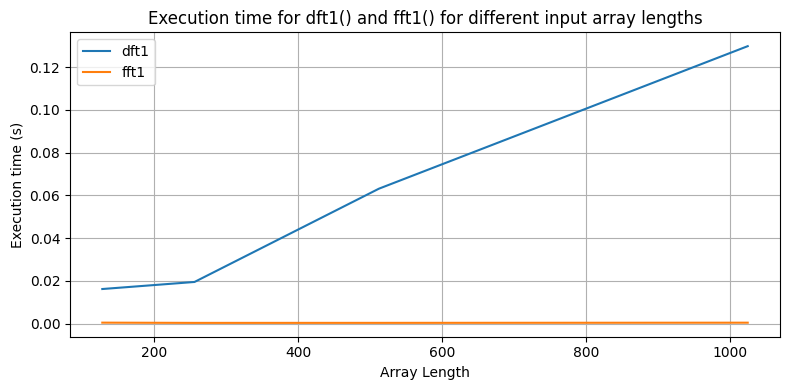

In [ ]:
TEST_SAMPLES = [128, 256, 512, 1024]
DFT_EXEC_TIMES = []
FFT_EXEC_TIMES = []

for num_samples in TEST_SAMPLES:
    array = np.random.randn(num_samples)

    start_time = time.time()
    dft1(array)
    end_time = time.time()
    DFT_EXEC_TIMES.append(end_time - start_time)

    start_time = time.time()
    fft1(array)
    end_time = time.time()
    FFT_EXEC_TIMES.append(end_time - start_time)

plt.figure(figsize=(8, 4))
plt.plot(TEST_SAMPLES, DFT_EXEC_TIMES, label='dft1')
plt.plot(TEST_SAMPLES, FFT_EXEC_TIMES, label='fft1')
plt.title('Execution time for dft1() and fft1() for different input array lengths')
plt.ylabel('Execution time (s)')
plt.xlabel('Array Length')
plt.legend()
plt.grid()

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/dft1_fft1_exec_time.png')

**Comments**:

- DFT has a time complexity of $O(n^2)$ compared to $O(n \log n)$ of FFT. The execution time of DFT thus grows much faster than FFT.

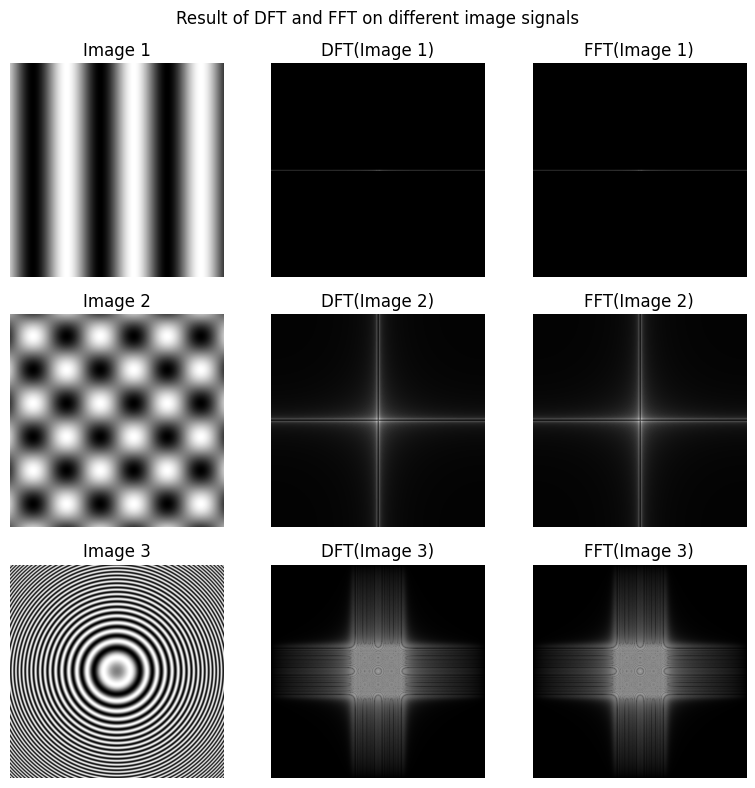

In [12]:
x = np.linspace(-10, 10, 512)
y = np.linspace(-10, 10, 512)
X, Y = np.meshgrid(x, y)

I_1 = 0.5 * (1 + np.sin(X))
I_2 = 0.5 * (1 + (np.sin(X) * np.sin(Y)))
I_3 = 0.5 * (1 + np.sin(X**2 + Y**2))

DFT_I_1 = dft2(I_1)
DFT_I_2 = dft2(I_2)
DFT_I_3 = dft2(I_3)

FFT_I_1 = fft2(I_1)
FFT_I_2 = fft2(I_2)
FFT_I_3 = fft2(I_3)

fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.suptitle('Result of DFT and FFT on different image signals')

display_image(I_1, 'Image 1', axs[0][0])
display_image(fftshift_log_abs(DFT_I_1), 'DFT(Image 1)', axs[0][1])
display_image(fftshift_log_abs(FFT_I_1), 'FFT(Image 1)', axs[0][2])

display_image(I_2, 'Image 2', axs[1][0])
display_image(fftshift_log_abs(DFT_I_2), 'DFT(Image 2)', axs[1][1])
display_image(fftshift_log_abs(FFT_I_2), 'FFT(Image 2)', axs[1][2])

display_image(I_3, 'Image 3', axs[2][0])
display_image(fftshift_log_abs(DFT_I_3), 'DFT(Image 3)', axs[2][1])
display_image(fftshift_log_abs(FFT_I_3), 'FFT(Image 3)', axs[2][2])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/image_signals_dft_fft.png')

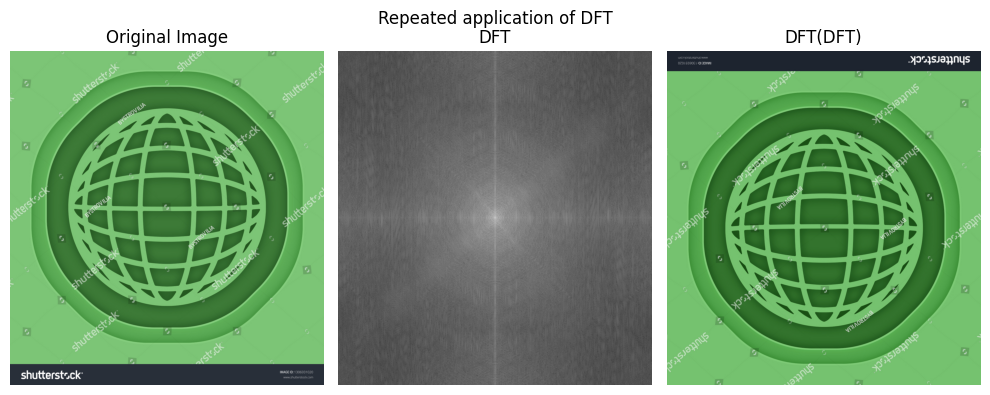

In [13]:
def minmax_normalize(data: npt.NDArray[float]) -> npt.NDArray[np.uint8]:
    """ Applies min-max normalization on input array. """

    min_val = np.min(data)
    max_val = np.max(data)
    normalized = 255 * (data - min_val) / (max_val - min_val)
    return normalized.astype(np.uint8)

img1 = read_image(f'{IMAGES_DIR}/img1.jpg')
img1_dft = [dft2(img1[:, :, 0]), dft2(img1[:, :, 1]), dft2(img1[:, :, 2])]
img1_dft_dft = [dft2(img1_dft[0]), dft2(img1_dft[1]), dft2(img1_dft[2])]

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle('Repeated application of DFT')

display_image(img1, 'Original Image', axs[0])
display_image(fftshift_log_abs(np.sum(img1_dft, axis=0)), 'DFT', axs[1])
display_image(minmax_normalize(np.real(np.stack(img1_dft_dft, axis=2))), 'DFT(DFT)', axs[2])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/img1_dft.png')

**Comments**:

- As noted in theory, application of DFT twice results in the same image but flipped across all its axes.

### Question 2

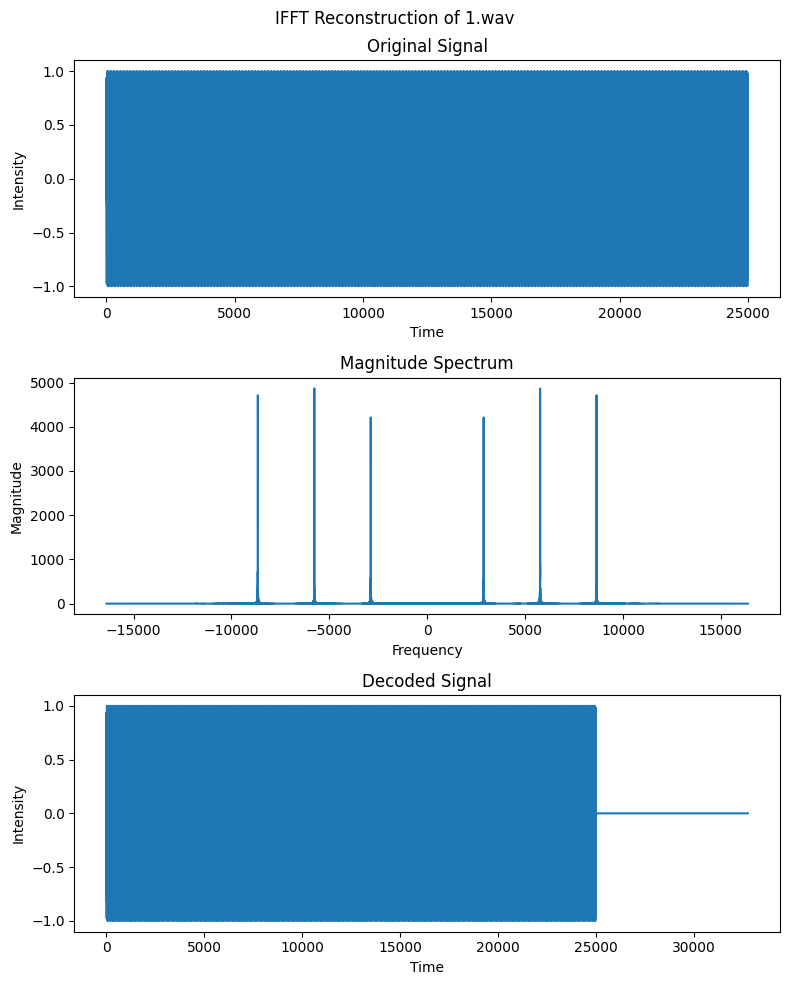

In [ ]:
def ifft1(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 1D Inverse Fast Fourier Transform (IFFT) of an array. """

    assert x.ndim == 1
    N = x.shape[0]

    # Padding
    if not np.log2(N).is_integer():
        N_padded = 2**int(np.ceil(np.log2(N)))
        x = np.pad(x, (0, N_padded - N))
        N = N_padded

    # Base case
    if N <= 1:
        return x

    # Recursion
    even = ifft1(x[::2])
    odd = ifft1(x[1::2])
    T = np.exp(2j * np.pi * np.arange(N // 2) / N) * odd
    return np.concatenate([even + T, even - T]) / 2

y, sr = librosa.load(f'{IMAGES_DIR}/1.wav', sr=5000)
y_fft = fft1(y)
y_ifft = np.real(ifft1(y_fft))

fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('IFFT Reconstruction of 1.wav')

axs[0].plot(y)
axs[0].set_title('Original Signal')
axs[0].set_ylabel('Intensity')
axs[0].set_xlabel('Time')

axs[1].plot(np.arange(-np.ceil(y_fft.shape[0] / 2), np.floor(y_fft.shape[0] / 2)), fftshift_abs(y_fft))
axs[1].set_title('Magnitude Spectrum')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency')

axs[2].plot(y_ifft)
axs[2].set_title('Decoded Signal')
axs[2].set_ylabel('Intensity')
axs[2].set_xlabel('Time')

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/1_wav_ifft_reconstruction.png')

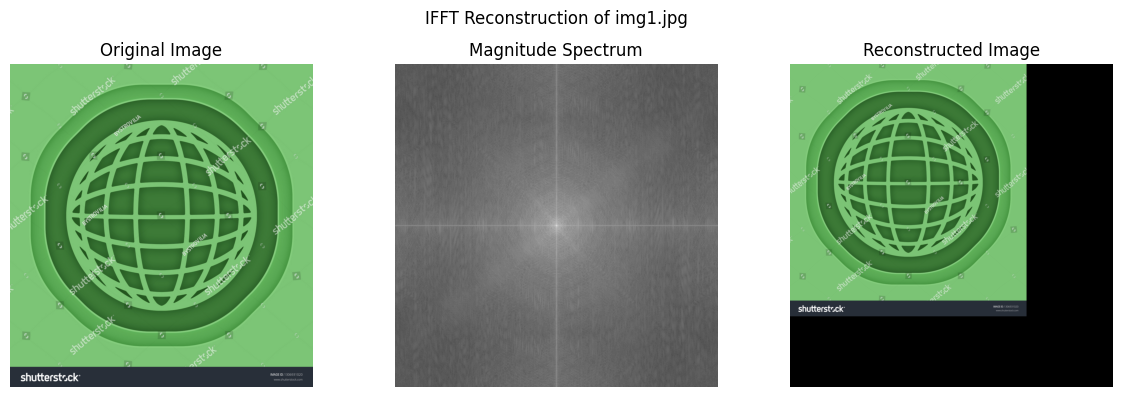

In [ ]:
def ifft2(x: npt.NDArray[float]) -> npt.NDArray[float]:
    """ Computes the 2D Inverse Fast Fourier Transform (IFFT) of an array. """

    assert x.ndim == 2
    rows, cols = x.shape

    # Padding
    if not np.log2(rows).is_integer():
        rows_padded = 2**int(np.ceil(np.log2(rows)))
        x = np.pad(x, ((0, rows_padded - rows), (0, 0)))
    if not np.log2(cols).is_integer():
        cols_padded = 2**int(np.ceil(np.log2(cols)))
        x = np.pad(x, ((0, 0), (0, cols_padded - cols)))

    # Apply ifft1
    ifft_rows = np.apply_along_axis(ifft1, axis=1, arr=x)
    return np.apply_along_axis(ifft1, axis=0, arr=ifft_rows)

img1 = read_image(f'{IMAGES_DIR}/img1.jpg')
img1_fft = [fft2(img1[:, :, 0]), fft2(img1[:, :, 1]), fft2(img1[:, :, 2])]
img1_ifft = [ifft2(img1_fft[0]), ifft2(img1_fft[1]), ifft2(img1_fft[2])]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('IFFT Reconstruction of img1.jpg')

display_image(img1, 'Original Image', axs[0])
display_image(fftshift_log_abs(np.sum(img1_fft, axis=0)), 'Magnitude Spectrum', axs[1])
display_image(np.real(np.stack(img1_ifft, axis=2)).astype(np.uint8), 'Reconstructed Image', axs[2])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/img1_ifft_reconstruction.png')

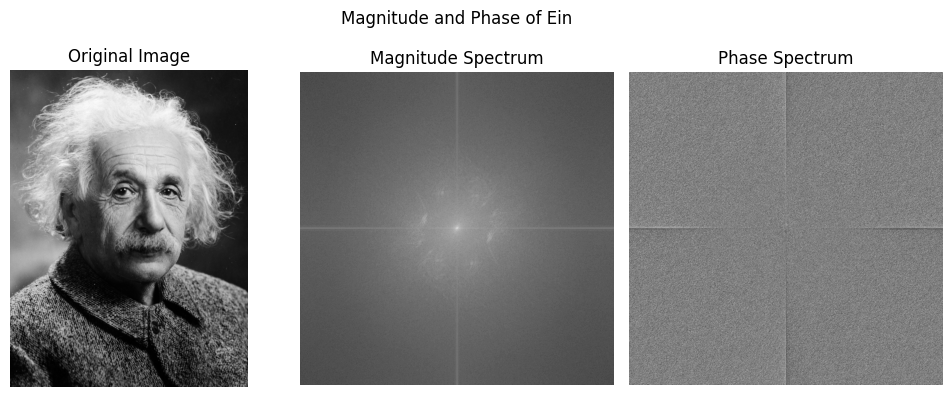

In [16]:
ein = read_image(f'{IMAGES_DIR}/ein.jpeg', color_space='gray')
ein_fft = fft2(ein)
ein_fft_mag = np.abs(ein_fft)
ein_fft_phase = np.angle(ein_fft)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle('Magnitude and Phase of Ein')

display_image(ein, 'Original Image', axs[0])
display_image(fftshift_log(ein_fft_mag), 'Magnitude Spectrum', axs[1])
display_image(fftshift(ein_fft_phase), 'Phase Spectrum', axs[2])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/ein_magnitude_phase.png')

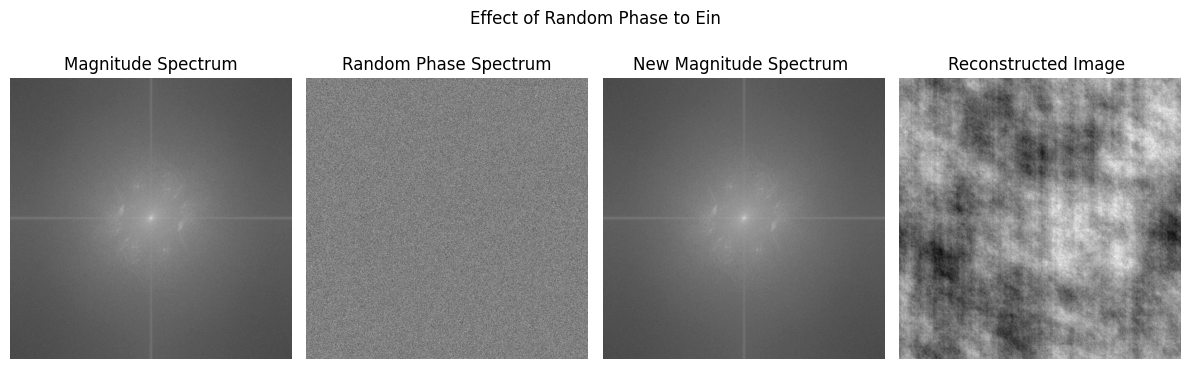

In [17]:
random_phase = np.random.uniform(0, 2 * np.pi, size=ein_fft_phase.shape)
ein_fft_random_phase = ein_fft_mag * np.exp(1j * random_phase)
ein_ifft_random_phase = ifft2(ein_fft_random_phase)

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Effect of Random Phase to Ein')

display_image(fftshift_log(ein_fft_mag), 'Magnitude Spectrum', axs[0])
display_image(fftshift(random_phase), 'Random Phase Spectrum', axs[1])
display_image(fftshift_log_abs(ein_fft_random_phase), 'New Magnitude Spectrum ', axs[2])
display_image(np.real(ein_ifft_random_phase), 'Reconstructed Image ', axs[3])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/ein_random_phase.png')

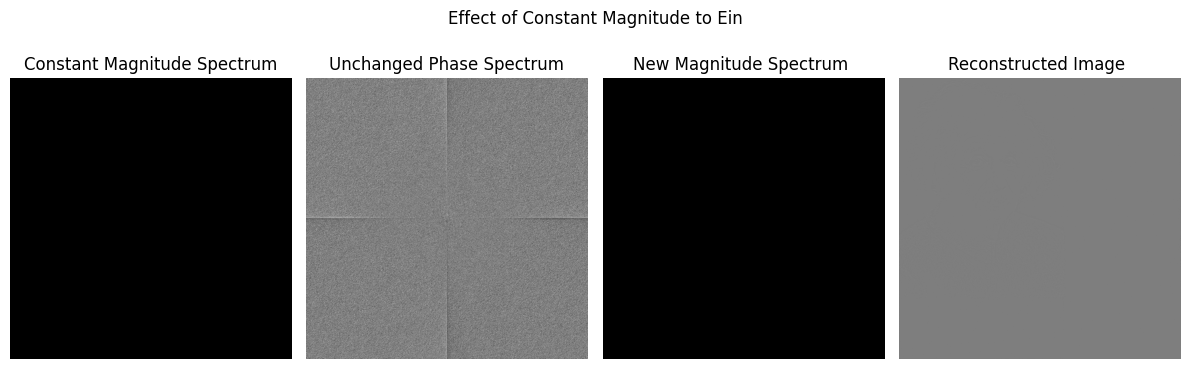

In [18]:
constant_magnitude = np.full(ein_fft_mag.shape, np.mean(ein_fft_mag))
ein_fft_constant_magnitude = constant_magnitude * np.exp(1j * ein_fft_phase)
ein_ifft_constant_magnitude = ifft2(ein_fft_constant_magnitude)

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Effect of Constant Magnitude to Ein')

display_image(fftshift_log(constant_magnitude), 'Constant Magnitude Spectrum', axs[0])
display_image(fftshift(ein_fft_phase), 'Unchanged Phase Spectrum', axs[1])
display_image(fftshift_log_abs(ein_fft_constant_magnitude), 'New Magnitude Spectrum ', axs[2])
display_image(np.real(ein_ifft_constant_magnitude), 'Reconstructed Image ', axs[3])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/ein_constant_magnitude.png')

### Question 3

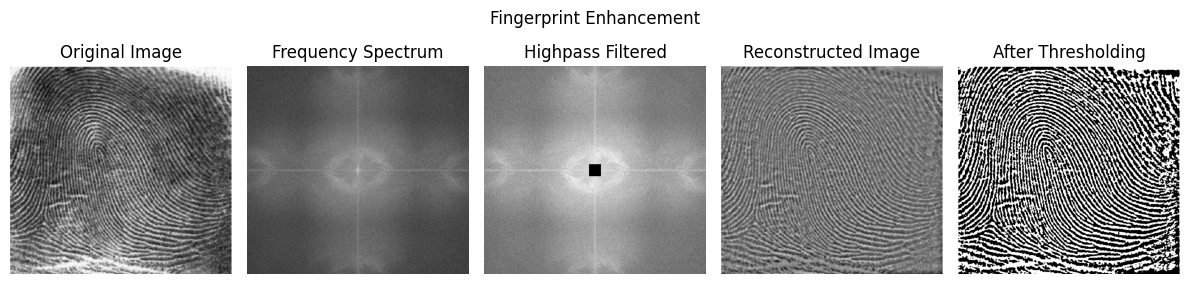

In [19]:
def ideal_highpass_filter(X: npt.NDArray[float], radius) -> npt.NDArray[float]:
    rows, cols = X.shape
    center_row, center_col = rows // 2, cols // 2

    mask = np.zeros((rows, cols), dtype=np.float64)
    for i in range(rows):
        for j in range(cols):
            y = i - center_row
            x = j - center_col
            if abs(x) > radius or abs(y) > radius:
                mask[i, j] = 1

    return X * mask

fingerprint = read_image(f'{IMAGES_DIR}/fingerprint.png', color_space='gray')
fingerprint_fft = np.fft.fft2(fingerprint)

fingerprint_fft_filtered = fftshift(fingerprint_fft)
fingerprint_fft_filtered = ideal_highpass_filter(fingerprint_fft_filtered, 15)
fingerprint_fft_filtered = np.roll(fftshift(fingerprint_fft_filtered), 1, 1)

fingerprint_ifft = np.real(np.fft.ifft2(fingerprint_fft_filtered))

fingerprint_binary = fingerprint_ifft.copy()
fingerprint_binary[fingerprint_binary > 0] = 255
fingerprint_binary[fingerprint_binary <= 0] = 0

write_image(f'{OUTPUT_DIR}/fingerprint.png', fingerprint_binary)

fig, axs = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Fingerprint Enhancement')

display_image(fingerprint, 'Original Image', axs[0])
display_image(fftshift_log_abs(fingerprint_fft), 'Frequency Spectrum', axs[1])
display_image(fftshift_log_abs(fingerprint_fft_filtered), 'Highpass Filtered', axs[2])
display_image(fingerprint_ifft, 'Reconstructed Image', axs[3])
display_image(fingerprint_binary, 'After Thresholding', axs[4])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/fingerprint_enhancement.png')

### Question 4

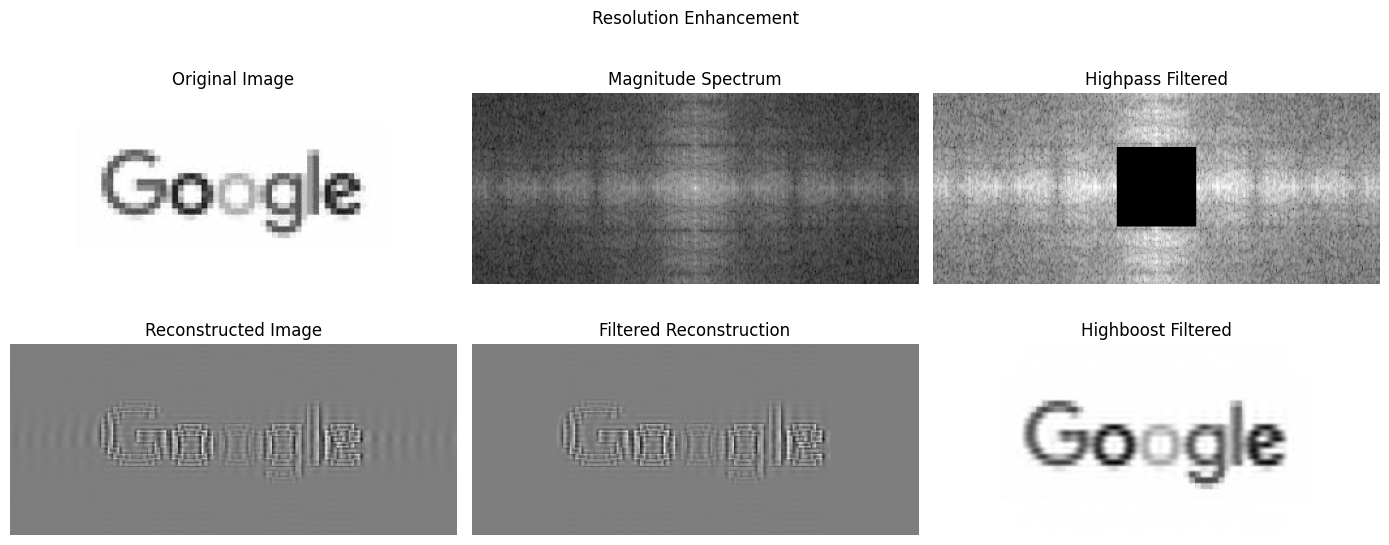

In [20]:
google = read_image(f'{IMAGES_DIR}/google.jpeg', color_space='gray')
google_fft = np.fft.fft2(google)

google_fft_filtered = fftshift(google_fft)
google_fft_filtered = ideal_highpass_filter(google_fft_filtered, 30)
google_fft_filtered = np.roll(fftshift(google_fft_filtered), 0, 1)
google_fft_filtered = np.roll(google_fft_filtered, 1, 1)

google_ifft = np.real(np.fft.ifft2(google_fft_filtered))
google_ifft_filtered = google_ifft.copy()
google_ifft_filtered[:, :65] = 0
google_ifft_filtered[:, 275:] = 0

google_enhanced = np.clip(google + google_ifft_filtered, 0, 255).astype(np.uint8)
write_image(f'{OUTPUT_DIR}/google.png', google_enhanced)

fig, axs = plt.subplots(2, 3, figsize=(14, 6))
fig.suptitle('Resolution Enhancement')

display_image(google, 'Original Image', axs[0][0])
display_image(fftshift_log_abs(google_fft), 'Magnitude Spectrum', axs[0][1])
display_image(fftshift_log_abs(google_fft_filtered), 'Highpass Filtered', axs[0][2])
display_image(google_ifft, 'Reconstructed Image', axs[1][0])
display_image(google_ifft_filtered, 'Filtered Reconstruction', axs[1][1])
display_image(google_enhanced, 'Highboost Filtered', axs[1][2])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/google_resolution_enhancement.png')

### Question 5

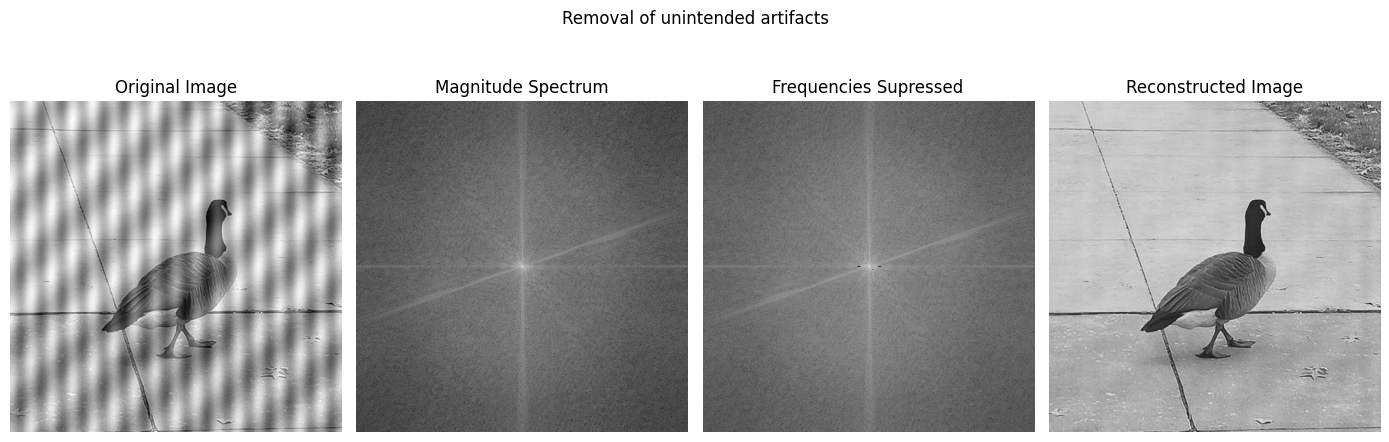

In [21]:
bird = read_image(f'{IMAGES_DIR}/bird.png', color_space='gray')
bird_fft = np.fft.fft2(bird)

bird_fft_filtered = fftshift(bird_fft)
bird_fft_filtered[256, 238:243] = 0
bird_fft_filtered[256, 270:275] = 0
bird_fft_filtered[[251, 261], [251, 261]] = 0
bird_fft_filtered = fftshift(bird_fft_filtered)

bird_ifft = np.real(np.fft.ifft2(bird_fft_filtered))
write_image(f'{OUTPUT_DIR}/bird.png', bird_ifft)

fig, axs = plt.subplots(1, 4, figsize=(14, 5))
fig.suptitle('Removal of unintended artifacts')

display_image(bird, 'Original Image', axs[0])
display_image(fftshift_log_abs(bird_fft), 'Magnitude Spectrum', axs[1])
display_image(fftshift_log_abs(bird_fft_filtered), 'Frequencies Supressed', axs[2])
display_image(bird_ifft, 'Reconstructed Image', axs[3])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/bird_artifact_removal.png')

**Comments**:

- We identify the outlier frequencies resulting in the artifacts and suppress them to restore a more likely view of the original image.

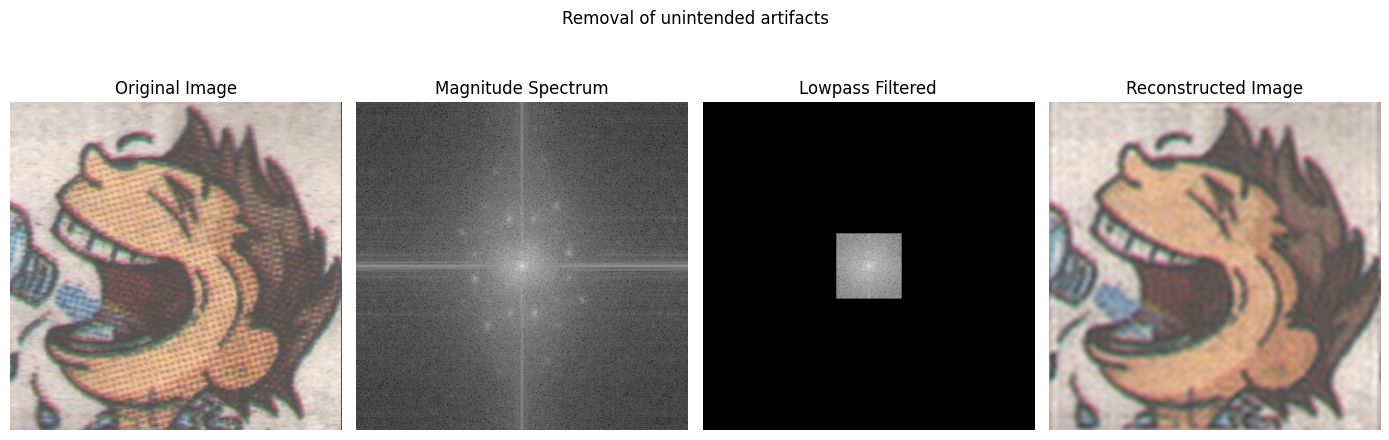

In [22]:
def ideal_lowpass_filter(X: npt.NDArray[float], radius) -> npt.NDArray[float]:
    rows, cols = X.shape
    center_row, center_col = rows // 2, cols // 2

    mask = np.ones((rows, cols), dtype=np.float64)
    for i in range(rows):
        for j in range(cols):
            y = i - center_row
            x = j - center_col
            if abs(x) > radius or abs(y) > radius:
                mask[i, j] = 0

    return X * mask

cart = read_image(f'{IMAGES_DIR}/cart.jpg')
cart_fft = [np.fft.fft2(cart[:, :, 0]), np.fft.fft2(cart[:, :, 1]), np.fft.fft2(cart[:, :, 2])]

cart_fft_filtered = [fftshift(cart_fft[0]), fftshift(cart_fft[1]), fftshift(cart_fft[2])]
cart_fft_filtered = [ideal_lowpass_filter(cart_fft_filtered[0], 35), ideal_lowpass_filter(cart_fft_filtered[1], 35), ideal_lowpass_filter(cart_fft_filtered[2], 35)]
cart_fft_filtered = [np.roll(fftshift(cart_fft_filtered[0]), 1, 1), np.roll(fftshift(cart_fft_filtered[1]), 1, 1), np.roll(fftshift(cart_fft_filtered[2]), 1, 1)]

cart_ifft = np.stack((np.real(np.fft.ifft2(cart_fft_filtered[0])), np.real(np.fft.ifft2(cart_fft_filtered[1])), np.real(np.fft.ifft2(cart_fft_filtered[2]))), axis=2).astype(np.uint8)
write_image(f'{OUTPUT_DIR}/cart.png', cart_ifft)

fig, axs = plt.subplots(1, 4, figsize=(14, 5))
fig.suptitle('Removal of unintended artifacts')

display_image(cart, 'Original Image', axs[0])
display_image(fftshift_log_abs(np.sum(cart_fft, axis=0)), 'Magnitude Spectrum', axs[1])
display_image(fftshift_log_abs(np.sum(cart_fft_filtered, axis=0)), 'Lowpass Filtered', axs[2])
display_image(cart_ifft, 'Reconstructed Image', axs[3])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/cart_artifact_removal.png')

**Comments**:

- We use an ideal low pass filter to suppress the high frequencies leading to the unusual patterns on the character's face.

### Question 6

Detected 5 coins in the image


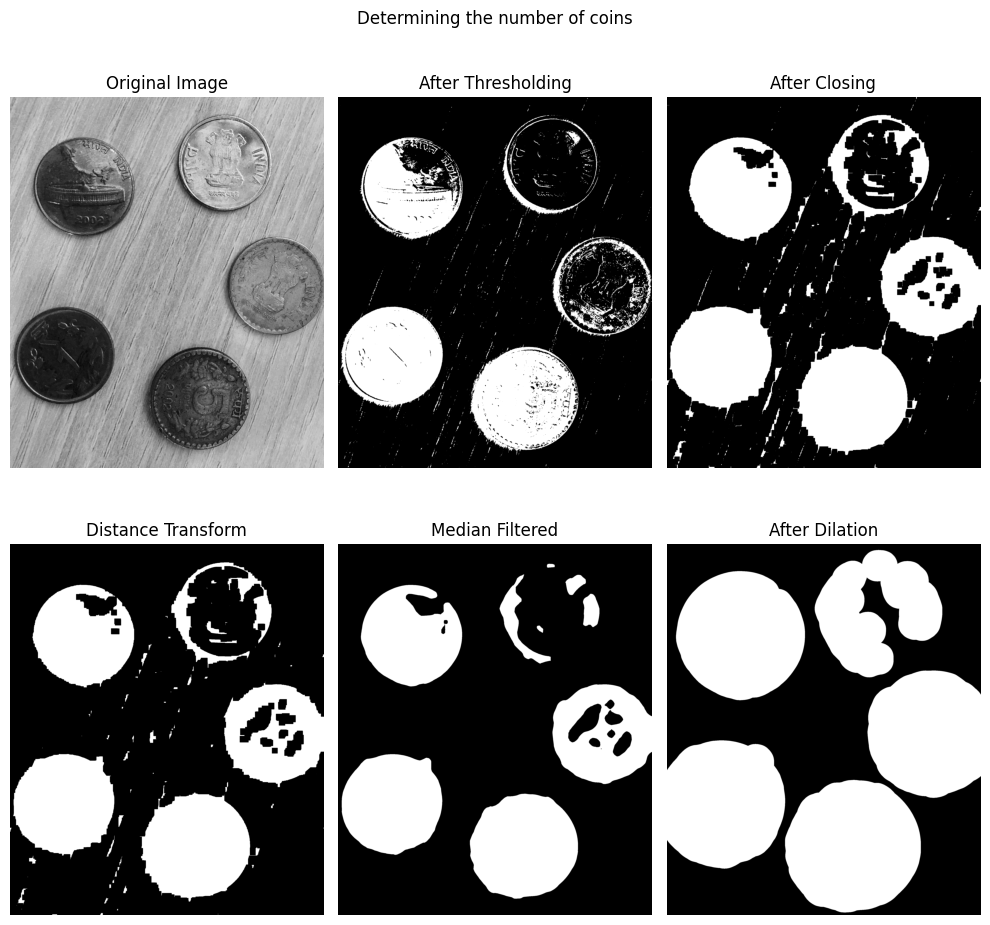

In [23]:
def coin_detection_counting(coin: npt.NDArray[np.uint8]) -> None:
    """ Pipeline to detect and count the number of coins in the image. """

    coin_binary = cv2.threshold(coin, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]

    coin_closing = cv2.dilate(coin_binary, np.ones((35, 35), np.uint8), 1)
    coin_closing = cv2.erode(coin_closing, np.ones((35, 35), np.uint8), 1)

    dist_transform = cv2.distanceTransform(coin_closing, cv2.DIST_L2, 0)
    dist_transform = cv2.threshold(dist_transform, 0.01 * dist_transform.max(), 255, cv2.THRESH_BINARY)[1].astype(np.uint8)

    dist_transform_blur = cv2.medianBlur(dist_transform, 65)
    dist_transform_dilation = cv2.dilate(dist_transform_blur, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (201, 201)), 1)
    write_image(f'{OUTPUT_DIR}/coin-detection.png', dist_transform_dilation)

    fig, axs = plt.subplots(2, 3, figsize=(10, 10))
    fig.suptitle('Determining the number of coins')

    display_image(coin, 'Original Image', axs[0][0])
    display_image(coin_binary, 'After Thresholding', axs[0][1])
    display_image(coin_closing, 'After Closing', axs[0][2])
    display_image(dist_transform, 'Distance Transform', axs[1][0])
    display_image(dist_transform_blur, 'Median Filtered', axs[1][1])
    display_image(dist_transform_dilation, 'After Dilation', axs[1][2])

    plt.tight_layout()
    save_plot(f'{PLOTS_DIR}/coin_detection.png')

    num_coins = cv2.connectedComponents(dist_transform_dilation)[0] - 1
    return num_coins

coin = read_image(f'{IMAGES_DIR}/coin-detection.jpg', color_space='gray')
num_coins = coin_detection_counting(coin)
print(f'Detected {num_coins} coins in the image')

### Question 7

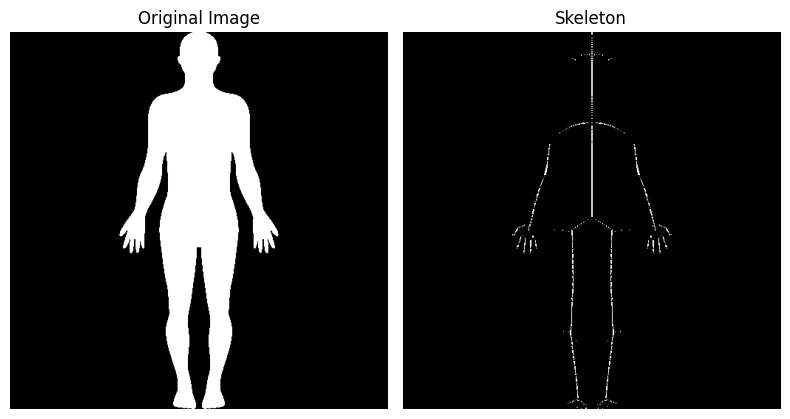

In [24]:
def skeletonize(image: npt.NDArray[np.uint8]) -> npt.NDArray[np.uint8]:
    """ Computes the skeleton of a binary image. """

    skeleton = np.zeros(image.shape, np.uint8)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    while True:
        eroded = cv2.erode(image, kernel)
        temp = cv2.dilate(eroded, kernel)
        temp = cv2.subtract(image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        image = eroded.copy()

        if cv2.countNonZero(image) == 0:
            break

    return skeleton

human = read_image(f'{IMAGES_DIR}/human.png', color_space='alpha')

human[human > 127] = 255
human[human <= 127] = 0

human_skeleton = skeletonize(human)
write_image(f'{OUTPUT_DIR}/human.png', human_skeleton)

fig, axs = plt.subplots(1, 2, figsize=(8, 8))

display_image(human, 'Original Image', axs[0])
display_image(human_skeleton, 'Skeleton', axs[1])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/human_skeletonization.png')

### Question 8

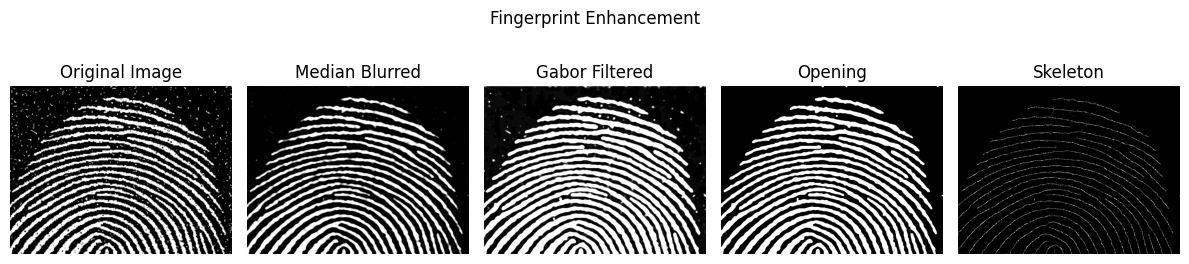

In [25]:
def gabor_filter(fingerprint_image, theta, ksize=7, sigma=1.0, lambd=10.0, gamma=0.5, psi=0):
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(fingerprint_image, cv2.CV_8UC3, gabor_kernel)
    return filtered_img

fingerprint2 = read_image(f'{IMAGES_DIR}/fingerprint2.png', color_space='gray')

fingerprint2_median = cv2.medianBlur(fingerprint2, 13)

fingerprint2_gabor = [gabor_filter(fingerprint2_median, theta) for theta in [0, np.pi/4, np.pi/2, 3*np.pi/2]]
fingerprint2_gabor = np.max(fingerprint2_gabor, axis=0)
fingerprint2_gabor = cv2.normalize(fingerprint2_gabor, None, 0, 255, cv2.NORM_MINMAX)

fingerprint2_opening = np.zeros_like(fingerprint2_gabor)
fingerprint2_opening[fingerprint2_gabor > 127] = 255
fingerprint2_opening = cv2.erode(fingerprint2_opening, np.ones((9, 9), dtype=np.uint8))
fingerprint2_opening = cv2.dilate(fingerprint2_opening, np.ones((7, 7), dtype=np.uint8))

fingerprint2_skeleton = skeletonize(fingerprint2_opening)
write_image(f'{OUTPUT_DIR}/fingerprint2.png', fingerprint2_skeleton)

fig, axs = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Fingerprint Enhancement')

display_image(fingerprint2, 'Original Image', axs[0])
display_image(fingerprint2_median, 'Median Blurred', axs[1])
display_image(fingerprint2_gabor, 'Gabor Filtered', axs[2])
display_image(fingerprint2_opening, 'Opening', axs[3])
display_image(fingerprint2_skeleton, 'Skeleton', axs[4])

plt.tight_layout()
save_plot(f'{PLOTS_DIR}/fingerprint2_enhancement.png')